# Kaggle Competition for House Prices : Advanced Regression Techniques

## Pulkit Khandelwal

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv files
df = pd.read_csv('data/train.csv')

In [3]:
#Displaying whole rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Finding missing values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

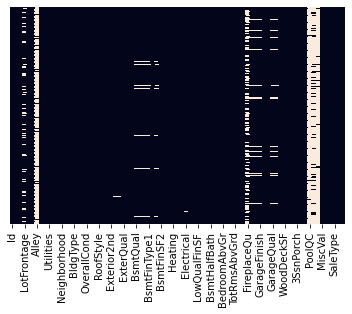

In [8]:
#Visualising the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Will be removing the column/feature that has almost missing values as compared to total no. of rows

## Data Preprocessing of Training Data

### Filling missing values

In [9]:
#LotFrontage Column
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [10]:
df['BsmtQual'].mode()[0]

'TA'

In [11]:
#BsmtQual Column
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [12]:
#BsmtCond Column
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)

In [13]:
#BsmtExposure Column
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)

In [14]:
#BsmtFinType1 Column
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)

In [15]:
#BsmtFinType2 Column
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [16]:
#Electrical Column
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

In [17]:
#FireplaceQu Column
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [18]:
#GarageType Column
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [19]:
#GarageFinish Column
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [20]:
#GarageQual Column
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [21]:
#GarageCond Column
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [22]:
#MasVnrType Column
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [23]:
#MasVnrArea Column
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0],inplace=True)

In [24]:
### Dropping Columns
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [25]:
#Checking again
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [26]:
df.shape

(1460, 77)

<AxesSubplot:>

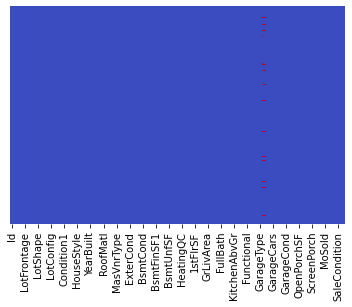

In [27]:
#Again visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

**Removing ID and GarageYrBlt (Year Column)**

In [28]:
df.drop(['Id','GarageYrBlt'],axis=1,inplace=True)

In [29]:
df.shape

(1460, 75)

## Data Preprocessing of Testing Data

### Filling Missing values

In [30]:
df_test = pd.read_csv('data/test.csv')

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [32]:
#Has some different columns missing that were not there in Training data
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [33]:
#MSZoning Column
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace=True)

In [34]:
#LotFrontage Column
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace=True)

In [35]:
#Utilities Column
df_test['Utilities'].fillna(df_test['Utilities'].mode()[0],inplace=True)

In [36]:
#Exterior1st Column
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],inplace=True)

In [37]:
#Exterior2nd Column
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],inplace=True)

In [38]:
#MasVnrType Column
df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],inplace=True)

In [39]:
#MasVnrArea Column
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0],inplace=True)

In [40]:
df_test['BsmtQual'].mode()[0]

'TA'

In [41]:
#BsmtQual Column
df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0],inplace=True)

In [42]:
#BsmtCond Column
df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0],inplace=True)

In [43]:
#BsmtExposure Column
df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0],inplace=True)

In [44]:
#BsmtFinType1 Column
df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0],inplace=True)

In [45]:
#BsmtFinSF1 Column
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean(),inplace=True)

In [46]:
#BsmtFinType2 Column
df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0],inplace=True)

In [47]:
#BsmtFinSF2 Column
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean(),inplace=True)

In [48]:
#BsmtUnfSF Column
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean(),inplace=True)

In [49]:
#TotalBsmtSF Column
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(),inplace=True)

In [50]:
#BsmtFullBath Column
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0],inplace=True)

In [51]:
#BsmtHalfBath Column
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0],inplace=True)

In [52]:
#KitchenQual Column
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],inplace=True)

In [53]:
#Functional Column
df_test['Functional'].fillna(df_test['Functional'].mode()[0],inplace=True)

In [54]:
#FireplaceQu Column
df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0],inplace=True)

In [55]:
#GarageType Column
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0],inplace=True)

In [56]:
#GarageFinish Column
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0],inplace=True)

In [57]:
#GarageCars Column
df_test['GarageCars'].fillna(df_test['GarageCars'].mean(),inplace=True)

In [58]:
#GarageArea Column
df_test['GarageArea'].fillna(df_test['GarageArea'].mean(),inplace=True)

In [59]:
#GarageQual Column
df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0],inplace=True)

In [60]:
#GarageCond Column
df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0],inplace=True)

In [61]:
#SaleType Column
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace=True)

In [62]:
### Dropping Columns
df_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [63]:
#Checking again
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


**Removing ID and GarageYrBlt (Year Column)**

In [64]:
df_test.drop(['Id','GarageYrBlt'],axis=1,inplace=True)

In [65]:
df_test.shape

(1459, 74)

Training data as well as Testing data is preprocessed, Now moving to further operation of Handling Categorical fatures

In [277]:
#List of categorical variables
cat_columns=[]

for i in df.columns.values:
    if df[i].dtypes == 'O':
        cat_columns.append(i)
        
print(cat_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [278]:
#length of Categorical variables
len(cat_columns)

39

In [279]:
#Difference in categories in Columns of Training and Testing dataset
for i in cat_columns:
    if len(df[i].value_counts()) < len(df_test[i].value_counts()):
        print(i)
    elif len(df[i].value_counts()) > len(df_test[i].value_counts()):
        print(i)

Utilities
Condition2
HouseStyle
RoofMatl
Exterior1st
Exterior2nd
Heating
Electrical
GarageQual


In [280]:
#Example
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [281]:
df_test['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

This means that there are several columns which have more categories either in training data or testing data and due to which if we convert training or testing data alone, all the categories will not be considered leading to mismatch of columns while doing OneHotEnconding

To arrive to solution, we can concat both training and testing and due to this all the categories will be covered leaving no category either in training or testing dataset

**Merging training data and testing data via rows**

In [282]:
final_df = pd.concat([df,df_test],axis=0)

In [283]:
final_df.shape

(2919, 75)

In [284]:
data = final_df.copy()

In [291]:
final_df_copy = data.copy()
for i in cat_columns:
    abc = pd.get_dummies(final_df_copy[i],drop_first=True)
    final_df_copy.drop([i],axis=1,inplace=True)
    final_df_copy = pd.concat([final_df_copy,abc],axis=1)

In [292]:
final_df_copy.shape

(2919, 236)

In [203]:
final_df_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0


### XGBoost

In [326]:
import xgboost

In [327]:
modelxg = xgboost.XGBRegressor()

In [339]:
final_df_copy_dup_rem = final_df_copy.loc[:,~final_df_copy.columns.duplicated()]

In [340]:
final_df_copy_dup_rem.shape

(2919, 176)

In [341]:
df_train = final_df_copy_dup_rem.iloc[:1460,:]
df_test = final_df_copy_dup_rem.iloc[1460:,:]

In [342]:
df_test.shape

(1459, 176)

In [343]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [344]:
df_test.shape

(1459, 175)

**Creating train features and train label from df_train**

In [345]:
X_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train['SalePrice']

In [346]:
modelxg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [347]:
#Training accuracy
modelxg.score(X_train,y_train)

0.9994490161963165

In [348]:
#Making predictions
preds = modelxg.predict(df_test)

## HyperParameter Tuning

In [364]:
n_estimators =[100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score =[0.25,0.5,0.75,1]


#Defining hyperparameter grid to search
hyperparameter_grid= {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'base_score':base_score
}

In [365]:
from sklearn.model_selection import RandomizedSearchCV

In [366]:
#RandomizedSearchCv
random_cv = RandomizedSearchCV(estimator=modelxg,
                              param_distributions=hyperparameter_grid,
                              cv=5,n_iter=50,
                              scoring='neg_mean_absolute_error',
                              verbose=2,
                              return_train_score=True,
                              random_state=42)

In [367]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[01:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, total=   1.0s
[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[01:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, total=   0.9s
[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[01:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, total=   0.8s
[CV] n_estimators=1500, min_child_weight=1, max_depth=15, lea

[CV]  n_estimators=900, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gbtree, base_score=0.5, total=   7.3s
[CV] n_estimators=900, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gbtree, base_score=0.5 
[CV]  n_estimators=900, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gbtree, base_score=0.5, total=   6.9s
[CV] n_estimators=900, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gbtree, base_score=0.5 
[CV]  n_estimators=900, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gbtree, base_score=0.5, total=   6.8s
[CV] n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.25 
[CV]  n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.25, total=   4.1s
[CV] n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.25 
[CV]  n_estimators=1500, min_child_weight=3, max_depth=2, learnin

[CV]  n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25, total=   1.3s
[CV] n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25, total=   1.0s
[CV] n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25, total=   1.8s
[CV] n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25, total=   2.0s
[CV] n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=1, max_depth=2, learning_rate=0.1, 

[CV]  n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.2, booster=gblinear, base_score=0.25, total=   0.8s
[CV] n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.2, booster=gblinear, base_score=0.25 
[01:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.2, booster=gblinear, base_score=0.25, total=   0.4s
[CV] n_estimators=500, min_child_weight=4, max_depth=10, learnin

[CV]  n_estimators=900, min_child_weight=4, max_depth=2, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   1.0s
[CV] n_estimators=900, min_child_weight=4, max_depth=2, learning_rate=0.05, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=4, max_depth=2, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   1.9s
[CV] n_estimators=900, min_child_weight=4, max_depth=2, learning_rate=0.05, booster=gbtree, base_score=0.25 
[CV]  n_estimators=900, min_child_weight=4, max_depth=2, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   1.7s
[CV] n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.2, booster=gbtree, base_score=0.5 
[CV]  n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.4s
[CV] n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.2, booster=gbtree, base_score=0.5 
[CV]  n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.2

[CV]  n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.25, total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.25 
[01:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.25, total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=2, learning

[CV]  n_estimators=900, min_child_weight=3, max_depth=5, learning_rate=0.05, booster=gblinear, base_score=1, total=   0.7s
[CV] n_estimators=900, min_child_weight=3, max_depth=5, learning_rate=0.05, booster=gblinear, base_score=1 
[01:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=900, min_child_weight=3, max_depth=5, learning_rate=0.05, booster=gblinear, base_score=1, total=   0.5s
[CV] n_estimators=900, min_child_weight=3, max_depth=5, learning_rate=0.0

[CV]  n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75, total=   0.2s
[CV] n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75 
[01:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75, total=   0.2s
[CV] n_estimators=100, min_child_weight=2, max_depth=15, learnin

[CV]  n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75, total=   0.6s
[CV] n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75 
[CV]  n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75, total=   0.7s
[CV] n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.25 
[01:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

[CV]  n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.2, booster=gblinear, base_score=1, total=   1.9s
[CV] n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.2, booster=gblinear, base_score=1 
[01:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.2, booster=gblinear, base_score=1, total=   1.0s
[CV] n_estimators=1500, min_child_weight=2, max_depth=10, learning_rate=0

[CV]  n_estimators=1100, min_child_weight=1, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.75, total=   0.7s
[CV] n_estimators=1100, min_child_weight=1, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.75 
[01:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=1100, min_child_weight=1, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.75, total=   1.4s
[CV] n_estimators=1100, min_child_weight=1, max_depth=2, lear

[CV]  n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.15, booster=gblinear, base_score=1, total=   1.0s
[CV] n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.15, booster=gblinear, base_score=1 
[01:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.15, booster=gblinear, base_score=1, total=   1.1s
[CV] n_estimators=900, min_child_weight=2, max_depth=3, learning_rate=0.1

[CV]  n_estimators=1500, min_child_weight=2, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.5, total=   1.2s
[CV] n_estimators=1500, min_child_weight=2, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.5 
[01:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=1500, min_child_weight=2, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.5, total=   2.7s
[CV] n_estimators=1500, min_child_weight=2, max_depth=15, lea

[CV]  n_estimators=900, min_child_weight=1, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.25, total=   1.0s
[CV] n_estimators=900, min_child_weight=1, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.25 
[01:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=900, min_child_weight=1, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.25, total=   0.9s
[CV] n_estimators=900, min_child_weight=1, max_depth=5, learning

[CV]  n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.5, total=   0.2s
[CV] n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.5 
[01:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.5, total=   0.2s
[CV] n_estimators=100, min_child_weight=3, max_depth=15, learning_r

[CV]  n_estimators=1100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75, total=   1.9s
[CV] n_estimators=1100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75 
[01:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=1100, min_child_weight=2, max_depth=15, learning_rate=0.1, booster=gblinear, base_score=0.75, total=   1.9s
[CV] n_estimators=1100, min_child_weight=2, max_depth=15, lea

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 10.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [368]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [373]:
xgregressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [374]:
xgregressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [375]:
#training score
xgregressor.score(X_train,y_train)

0.9834541876741096

In [376]:
#Making predictions
preds = xgregressor.predict(df_test)

### Creating dataframe for submission

In [377]:
test = pd.read_csv('data/test.csv')

In [378]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
30      1491
31      1492
32      1493
33      1494
34      1495
35      1496
36      1497
37      1498
38      1499
39      1500
40      1501
41      1502
42      1503
43      1504
44      1505
45      1506
46      1507
47      1508
48      1509
49      1510
50      1511
51      1512
52      1513
53      1514
54      1515
55      1516
56      1517
57      1518
58      1519
59      1520
60      1521
61      1522
62      1523
63      1524
64      1525
65      1526
66      1527
67      1528
68      1529
69      1530
70      1531
71      1532
72      1533
73      1534
74      1535
75      1536
76      1537

In [379]:
submission_df = pd.DataFrame()
submission_df['Id'] = test['Id']
submission_df['SalePrice'] = preds

In [380]:
submission_df.head()

,Id,SalePrice
0,1461,120293.859375
1,1462,160784.328125
2,1463,186468.062500
3,1464,193961.453125
4,1465,199362.593750


In [381]:
submission_df.to_csv('kaggle_submission.csv',index=False)